<a href="https://colab.research.google.com/github/Fer-Xavier/Imagenes-/blob/main/15%20Correlaci%C3%B3n%20Cruzada%20Normalizada/NCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
!wget -nc 'https://raw.githubusercontent.com/Jegovila/SI2/refs/heads/main/15%20Correlaci%C3%B3n%20Cruzada%20Normalizada/Image_1.bmp'
!wget -nc 'https://raw.githubusercontent.com/Jegovila/SI2/refs/heads/main/15%20Correlaci%C3%B3n%20Cruzada%20Normalizada/Template.bmp'

import numpy as np
import cv2
import matplotlib.pyplot as plt
from IPython import display

File ‘Image_1.bmp’ already there; not retrieving.

File ‘Template.bmp’ already there; not retrieving.



NCC

In [26]:
def NCC(img, temp, x, y):
    H = temp.shape[0]
    W = temp.shape[1]

    sum_img = 0.0
    sum_temp = 0.0
    sum_2 = 0.0

    for i in range(W):
        for j in range(H):
            sum_img = sum_img + float(img[int(y)+j, int(x)+i]) ** 2
            sum_temp = sum_temp + float(temp[j, i]) ** 2
            sum_2 = sum_2 + float(img[int(y)+j, int(x)+i]) * float(temp[j, i])

    val = sum_2 / (np.sqrt(float(sum_img)) * np.sqrt(float(sum_temp)))

    return val

Algoritmo

El código de ayuda contempla DE, pero puedes utilizar cualquiera visto en clase.

In [27]:
def DE(img, temp, animacion):
    n_Gen = 60
    n_Pop = 100
    dim = 2

    F = 0.6
    Cr = 0.9

    img_g = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    temp_g = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)

    img_H = img_g.shape[0]
    img_W = img_g.shape[1]
    temp_H = temp_g.shape[0]
    temp_W = temp_g.shape[1]

    lb = np.array([1, 1])
    ub = np.array([img_W-temp_W, img_H-temp_H])

    x = np.zeros((dim, n_Pop))
    fitness = -1 * np.ones(n_Pop)

    for i in range(n_Pop):
        x[0, i] = np.random.randint(lb[0], ub[0])
        x[1, i] = np.random.randint(lb[1], ub[1])

        fitness[i] = NCC(img_g, temp_g, int(x[0, i]), int(x[1, i]))

    best_plot = np.zeros(n_Gen)



    for n in range(n_Gen):
        if animacion:
            img_2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.clf()
            display.display(plt.gcf())
            display.clear_output(wait=True)
            plt.imshow(img_2)

            for i in range(n_Pop):
                plt.plot([x[0, i], x[0, i] + temp_W], [x[1, i], x[1, i]], color=(0,1,0), linewidth=3)
                plt.plot([x[0, i], x[0, i]], [x[1, i], x[1, i] + temp_H], color=(0,1,0), linewidth=3)
                plt.plot([x[0, i] + temp_W, x[0, i] + temp_W], [x[1, i], x[1, i] + temp_H], color=(0,1,0), linewidth=3)
                plt.plot([x[0, i], x[0, i] + temp_W], [x[1, i] + temp_H, x[1, i] + temp_H], color=(0,1,0), linewidth=3)
            plt.show(block=False)
            plt.pause(.05)
            #plt.show()

        for i in range(n_Pop):
            # Mutación
            r1 = i
            while r1 == i:
                r1 = np.random.randint(n_Pop)

            r2 = r1
            while r2 == r1 or r2 == i:
                r2 = np.random.randint(n_Pop)

            r3 = r2
            while r3 == r2 or r3 == r1 or r3 == i:
                r3 = np.random.randint(n_Pop)

            v = x[:, r1] + F * (x[:, r2] - x[:, r3])

            # Recombinación
            u = np.zeros(dim)

            for j in range(dim):
                r = np.random.rand()

                if r <= Cr:
                    u[j] = v[j]
                else:
                    u[j] = x[j, i]

            u[0] = np.clip(u[0], lb[0], ub[0])
            # u[1] es la coordenada y
            u[1] = np.clip(u[1], lb[1], ub[1])
            # Selección
            fitness_u = NCC(img_g, temp_g, int(u[0]), int(u[1]))

            #Antes
            if fitness_u > fitness[i]:
              x[:, i] = u
              fitness[i] = fitness_u

        best_plot[n] = np.max(fitness)

    ind = np.argmax(fitness)
    p = x[:, ind]

    plt.plot(best_plot)
    plt.xlabel("Generación")
    plt.ylabel("Fitness")
    plt.show()

    return p

Algoritmo

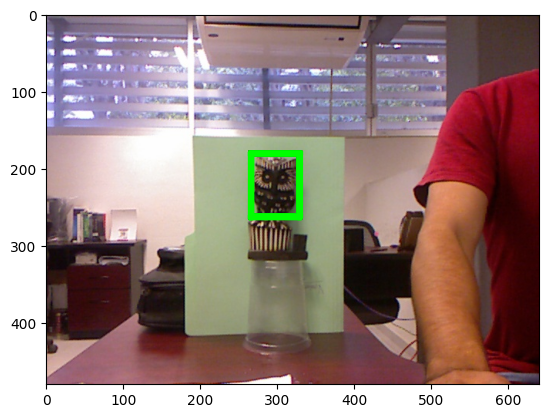

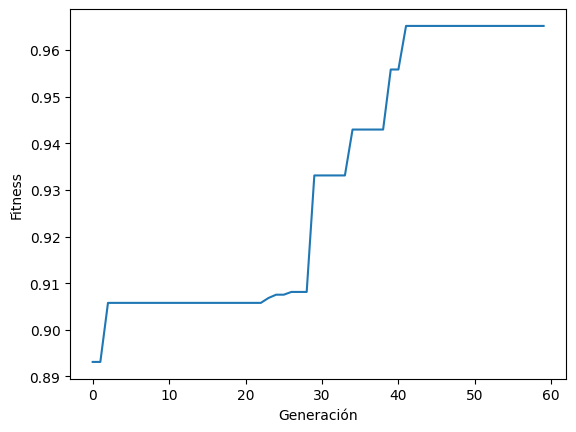

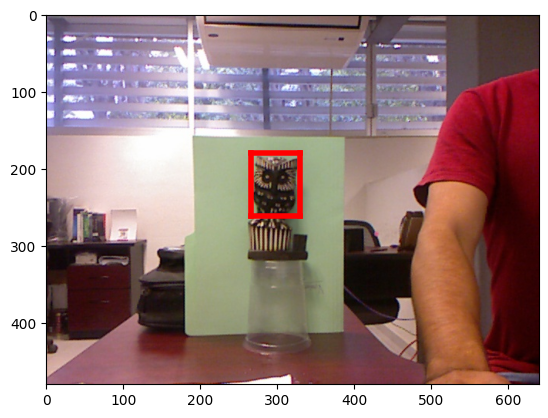

In [28]:
animacion = 1

img = cv2.imread('Image_1.bmp')
temp = cv2.imread('Template.bmp')

p = DE(img, temp, animacion)

img_H = img.shape[0]
img_W = img.shape[1]
temp_H = temp.shape[0]
temp_W = temp.shape[1]

xp = p[0]
yp = p[1]

img_2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_2)
plt.plot([xp, xp+temp_W], [yp, yp], 'r', linewidth=4)
plt.plot([xp, xp], [yp, yp+temp_H],'r', linewidth=4)
plt.plot([xp+temp_W, xp+temp_W], [yp, yp+temp_H],'r', linewidth=4)
plt.plot([xp, xp+temp_W], [yp+temp_H, yp+temp_H],'r', linewidth=4)
plt.show()